<a href="https://colab.research.google.com/github/Nattakonjpg/Project-Valolyze/blob/main/KKU_MoviNet_Train_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Coonect Google Drive (ใช้)
- Add Shortcut from Shared with me drive to main drive in google drive to easy find path in google colab


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Game analysis/Video/Vdo_model
%ls

/content/drive/.shortcut-targets-by-id/1jusOl_HN_QQ9kYMlGXffiLoyy9tUOXuM/Game analysis/Video/Vdo_model
 Jett/                       test_train_splits_3/              video_data_3_jett/
 Model/                      test_train_splits_4_yoru+habor/   video_data_4_yoru+habor/
'Other Video'/               test_train_splits_5_sova/         video_data_5_sova/
 __pycache__/                test_train_splits_yoru/           video_data_yoru/
 test_file_other/            transforms.py                    'video แบ่งรอบไม่ตัด'/
 test_train_splits/          video_data/                      'เก็บ csv ผลโมเดล'/
 test_train_splits_2_Sage/   video_data_2_Sage/


## Drive tung

In [ ]:
%cd /content/drive/MyDrive/Game analysis_tung/Project Harbor
%ls

/content/drive/.shortcut-targets-by-id/1DcpZviGZgfrnwbqJCHW81CqwIPfVaxBy/Project Harbor
 A4_yoru+habor_8class_yoru_Checkpoint_round1.pth   A4_yoru+habor_checkpoint_epoch_round17.pth
 A4_yoru+habor_checkpoint_epoch_round110.pth       A4_yoru+habor_checkpoint_epoch_round18.pth
 A4_yoru+habor_checkpoint_epoch_round111.pth       A4_yoru+habor_checkpoint_epoch_round19.pth
 A4_yoru+habor_checkpoint_epoch_round112.pth       Model/
 A4_yoru+habor_checkpoint_epoch_round11.pth        __pycache__@
 A4_yoru+habor_checkpoint_epoch_round12.pth       'Save model A5'/
 A4_yoru+habor_checkpoint_epoch_round13.pth        test_train_splits/
 A4_yoru+habor_checkpoint_epoch_round14.pth        transforms.py
 A4_yoru+habor_checkpoint_epoch_round15.pth        video_data/
 A4_yoru+habor_checkpoint_epoch_round16.pth


## Install Package and Library (ใช้)


In [3]:
!pip install av

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 28.0 MB/s eta 0:00:00


In [4]:
pip install git+https://github.com/Atze00/MoViNet-pytorch.git

  Cloning https://github.com/Atze00/MoViNet-pytorch.git to /tmp/pip-req-build-bw9izrip
  Running command git clone --filter=blob:none --quiet https://github.com/Atze00/MoViNet-pytorch.git /tmp/pip-req-build-bw9izrip
  Resolved https://github.com/Atze00/MoViNet-pytorch.git to commit c2d1edf48fc6c5259707f9d833f22171b4f63493
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for MoViNet-pytorch: filename=MoViNet_pytorch-0.2.2-py3-none-any.whl size=11959 sha256=17d27db645d0c21a95138f83c7757c2cb78ae00e78b73d96badda84783a8dea0
  Stored in directory: /tmp/pip-ephem-wheel-cache-2l19dlux/wheels/a4/76/cf/b8a087460d770e5a44eff9ed975e225d43f007c8c14f8e26d2
  Created wheel for

##Import Dataset (ใช้)

In [5]:
import time
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import random_split, DataLoader
import torch
import transforms as T
from movinets import MoViNet
from movinets.config import _C

##Prepare Dataset

###For A0 model

In [ ]:
torch.manual_seed(97)
num_frames = 24 # 16
clip_steps = 12
Bs_Train = 1
Bs_Test = 1

transform = transforms.Compose([

                                 T.ToFloatTensorInZeroOne(),
                                 T.Resize((200, 200)),
                                 T.RandomHorizontalFlip(),
                                 #T.Normalize(mean=[0.43216, 0.394666, 0.37645], std=[0.22803, 0.22145, 0.216989]),
                                 T.RandomCrop((172, 172))]) # Size for model
transform_test = transforms.Compose([
                                 T.ToFloatTensorInZeroOne(),
                                 T.Resize((200, 200)),
                                 #T.Normalize(mean=[0.43216, 0.394666, 0.37645], std=[0.22803, 0.22145, 0.216989]),
                                 T.CenterCrop((172, 172))]) #Size for model


In [ ]:
hmdb51_train = torchvision.datasets.HMDB51('video_data/', 'test_train_splits/', num_frames,frame_rate=None,
                                                step_between_clips = clip_steps, fold=1, train=True,
                                                transform=transform, num_workers=2)

hmdb51_test = torchvision.datasets.HMDB51('video_data/', 'test_train_splits/', num_frames,frame_rate=None,
                                                step_between_clips = clip_steps, fold=1, train=False,
                                                transform=transform_test, num_workers=2)

In [ ]:
train_loader = DataLoader(hmdb51_train, batch_size=Bs_Train, shuffle=True)
test_loader  = DataLoader(hmdb51_test, batch_size=Bs_Test, shuffle=False)

In [ ]:
hmdb51_test_2 = torchvision.datasets.HMDB51('video_data_3/', 'test_train_splits_3/', num_frames,frame_rate=None,
                                                step_between_clips = clip_steps, fold=1, train=False,
                                                transform=transform_test, num_workers=2)
test_loader_2  = DataLoader(hmdb51_test_2, batch_size=Bs_Test, shuffle=False)

100%|██████████| 54/54 [09:16<00:00, 10.31s/it]
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/video_utils.py:219: UserWarning: There aren't enough frames in the current video to get a clip for the given clip length and frames between clips. The video (and potentially others) will be skipped.
  warnings.warn(


###For A1 Model

In [ ]:
torch.manual_seed(97)
num_frames = 24 # 16
clip_steps = 12
Bs_Train = 1
Bs_Test = 1

transform_A1 = transforms.Compose([

                                 T.ToFloatTensorInZeroOne(),
                                 T.Resize((200, 200)),
                                 T.RandomHorizontalFlip(),
                                 #T.Normalize(mean=[0.43216, 0.394666, 0.37645], std=[0.22803, 0.22145, 0.216989]),
                                 T.RandomCrop((172, 172))]) # Size for model
transform_test_A1 = transforms.Compose([
                                 T.ToFloatTensorInZeroOne(),
                                 T.Resize((200, 200)),
                                 #T.Normalize(mean=[0.43216, 0.394666, 0.37645], std=[0.22803, 0.22145, 0.216989]),
                                 T.CenterCrop((172, 172))]) #Size for model


In [ ]:
hmdb51_train_A1 = torchvision.datasets.HMDB51('video_data_2/', 'test_train_splits_2/', num_frames,frame_rate=None,
                                                step_between_clips = clip_steps, fold=1, train=True,
                                                transform=transform_A1, num_workers=2)

hmdb51_test_A1 = torchvision.datasets.HMDB51('video_data_2/', 'test_train_splits_2/', num_frames,frame_rate=None,
                                                step_between_clips = clip_steps, fold=1, train=False,
                                                transform=transform_test_A1, num_workers=2)

100%|██████████| 54/54 [00:57<00:00,  1.07s/it]
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/video_utils.py:219: UserWarning: There aren't enough frames in the current video to get a clip for the given clip length and frames between clips. The video (and potentially others) will be skipped.
  warnings.warn(
100%|██████████| 54/54 [00:57<00:00,  1.06s/it]


In [ ]:
train_loader_A1 = DataLoader(hmdb51_train_A1, batch_size=Bs_Train, shuffle=True)
test_loader_A1  = DataLoader(hmdb51_test_A1, batch_size=Bs_Test, shuffle=False)

In [ ]:
hmdb51_test_A1 = torchvision.datasets.HMDB51('video_data_3/', 'test_train_splits_3/', num_frames,frame_rate=None,
                                                step_between_clips = clip_steps, fold=1, train=False,
                                                transform=transform_test_A1, num_workers=2)
test_loader_A1  = DataLoader(hmdb51_test_A1, batch_size=Bs_Test, shuffle=False)
print(hmdb51_test_A1)

100%|██████████| 54/54 [01:18<00:00,  1.46s/it]

Dataset HMDB51
    Number of datapoints: 719
    Root location: video_data_3/



/usr/local/lib/python3.10/dist-packages/torchvision/datasets/video_utils.py:219: UserWarning: There aren't enough frames in the current video to get a clip for the given clip length and frames between clips. The video (and potentially others) will be skipped.
  warnings.warn(


In [ ]:
print(hmdb51_test_A1)

Dataset HMDB51
    Number of datapoints: 719
    Root location: video_data_3/


### For A2 model

In [ ]:
torch.manual_seed(97)
num_frames = 24 # 16
clip_steps = 12
Bs_Train = 1
Bs_Test = 1

transform_A2 = transforms.Compose([

                                 T.ToFloatTensorInZeroOne(),
                                 T.Resize((300, 300)),
                                 T.RandomHorizontalFlip(),
                                 #T.Normalize(mean=[0.43216, 0.394666, 0.37645], std=[0.22803, 0.22145, 0.216989]),
                                 T.RandomCrop((224, 224))]) # Size for model
transform_test_A2 = transforms.Compose([
                                 T.ToFloatTensorInZeroOne(),
                                 T.Resize((300, 300)),
                                 #T.Normalize(mean=[0.43216, 0.394666, 0.37645], std=[0.22803, 0.22145, 0.216989]),
                                 T.CenterCrop((224, 224))]) #Size for model


In [ ]:
hmdb51_train_A2 = torchvision.datasets.HMDB51('video_data/', 'test_train_splits/', num_frames,frame_rate=None,
                                                step_between_clips = clip_steps, fold=1, train=True,
                                                transform=transform_A2, num_workers=2)

hmdb51_test_A2 = torchvision.datasets.HMDB51('video_data/', 'test_train_splits/', num_frames,frame_rate=None,
                                                step_between_clips = clip_steps, fold=1, train=False,
                                                transform=transform_test_A2, num_workers=2)

100%|██████████| 54/54 [08:23<00:00,  9.32s/it]
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/video_utils.py:219: UserWarning: There aren't enough frames in the current video to get a clip for the given clip length and frames between clips. The video (and potentially others) will be skipped.
  warnings.warn(
100%|██████████| 54/54 [00:59<00:00,  1.09s/it]


In [ ]:
train_loader_A2 = DataLoader(hmdb51_train_A2, batch_size=Bs_Train, shuffle=True)
test_loader_A2  = DataLoader(hmdb51_test_A2, batch_size=Bs_Test, shuffle=False)

In [ ]:
hmdb51_test_A2 = torchvision.datasets.HMDB51('video_data_2/', 'test_train_splits_2/', num_frames,frame_rate=None,
                                                step_between_clips = clip_steps, fold=1, train=False,
                                                transform=transform_test_A2, num_workers=2)
test_loader_A2  = DataLoader(hmdb51_test_A2, batch_size=Bs_Test, shuffle=False)

100%|██████████| 54/54 [09:01<00:00, 10.03s/it]
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/video_utils.py:219: UserWarning: There aren't enough frames in the current video to get a clip for the given clip length and frames between clips. The video (and potentially others) will be skipped.
  warnings.warn(


###For A3 Model

In [ ]:
torch.manual_seed(97)
num_frames = 24 # 16
clip_steps = 12
Bs_Train = 1
Bs_Test = 1

transform_A3 = transforms.Compose([

                                 T.ToFloatTensorInZeroOne(),
                                 T.Resize((300, 300)),
                                 T.RandomHorizontalFlip(),
                                 #T.Normalize(mean=[0.43216, 0.394666, 0.37645], std=[0.22803, 0.22145, 0.216989]),
                                 T.RandomCrop((256, 256))]) # Size for model
transform_test_A3 = transforms.Compose([
                                 T.ToFloatTensorInZeroOne(),
                                 T.Resize((300, 300)),
                                 #T.Normalize(mean=[0.43216, 0.394666, 0.37645], std=[0.22803, 0.22145, 0.216989]),
                                 T.CenterCrop((256, 256))]) #Size for model


In [ ]:
hmdb51_train_A3 = torchvision.datasets.HMDB51('video_data/', 'test_train_splits/', num_frames,frame_rate=None,
                                                step_between_clips = clip_steps, fold=1, train=True,
                                                transform=transform_A3, num_workers=2)

hmdb51_test_A3 = torchvision.datasets.HMDB51('video_data/', 'test_train_splits/', num_frames,frame_rate=None,
                                                step_between_clips = clip_steps, fold=1, train=False,
                                                transform=transform_A3, num_workers=2)

100%|██████████| 54/54 [03:43<00:00,  4.14s/it]
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/video_utils.py:219: UserWarning: There aren't enough frames in the current video to get a clip for the given clip length and frames between clips. The video (and potentially others) will be skipped.
  warnings.warn(
100%|██████████| 54/54 [00:58<00:00,  1.08s/it]


In [ ]:
train_loader_A3 = DataLoader(hmdb51_train_A3, batch_size=Bs_Train, shuffle=True)
test_loader_A3  = DataLoader(hmdb51_test_A3 , batch_size=Bs_Test, shuffle=False)

###For Model A4

In [ ]:
torch.manual_seed(97)
num_frames = 24 # 16
clip_steps = 12
Bs_Train = 1
Bs_Test = 1

transform_A4 = transforms.Compose([

                                 T.ToFloatTensorInZeroOne(),
                                 T.Resize((300, 300)),
                                 T.RandomHorizontalFlip(),
                                 #T.Normalize(mean=[0.43216, 0.394666, 0.37645], std=[0.22803, 0.22145, 0.216989]),
                                 T.RandomCrop((290, 290))]) # Size for model
transform_test_A4 = transforms.Compose([
                                 T.ToFloatTensorInZeroOne(),
                                 T.Resize((300, 300)),
                                 #T.Normalize(mean=[0.43216, 0.394666, 0.37645], std=[0.22803, 0.22145, 0.216989]),
                                 T.CenterCrop((290, 290))]) #Size for model
hmdb51_train_A4 = torchvision.datasets.HMDB51('video_data_2', 'test_train_splits', num_frames,frame_rate=None,
                                                step_between_clips = clip_steps, fold=1, train=True,
                                                transform=transform_A4, num_workers=2)

hmdb51_test_A4 = torchvision.datasets.HMDB51('video_data', 'test_train_splits', num_frames,frame_rate=None,
                                                step_between_clips = clip_steps, fold=1, train=False,
                                                transform=transform_test_A4, num_workers=2)

train_loader_A4 = DataLoader(hmdb51_train_A4, batch_size=Bs_Train, shuffle=True)
test_loader_A4  = DataLoader(hmdb51_test_A4 , batch_size=Bs_Test, shuffle=False)

100%|██████████| 51/51 [08:44<00:00, 10.28s/it]
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/video_utils.py:219: UserWarning: There aren't enough frames in the current video to get a clip for the given clip length and frames between clips. The video (and potentially others) will be skipped.
  warnings.warn(
100%|██████████| 51/51 [01:09<00:00,  1.37s/it]


###For Model A5

In [ ]:
torch.manual_seed(97)
num_frames = 24 # 16
clip_steps = 12
Bs_Train = 1
Bs_Test = 1

transform_A5 = transforms.Compose([

                                 T.ToFloatTensorInZeroOne(),
                                 T.Resize((400, 400)),
                                 T.RandomHorizontalFlip(),
                                 #T.Normalize(mean=[0.43216, 0.394666, 0.37645], std=[0.22803, 0.22145, 0.216989]),
                                 T.RandomCrop((320, 320))]) # Size for model
transform_test_A5 = transforms.Compose([
                                 T.ToFloatTensorInZeroOne(),
                                 T.Resize((400, 400)),
                                 #T.Normalize(mean=[0.43216, 0.394666, 0.37645], std=[0.22803, 0.22145, 0.216989]),
                                 T.CenterCrop((320, 320))]) #Size for model
hmdb51_train_A5 = torchvision.datasets.HMDB51('video_data_4_yoru+habor', 'test_train_splits_4_yoru+habor', num_frames,frame_rate=None,
                                                step_between_clips = clip_steps, fold=1, train=True,
                                                transform=transform_A5, num_workers=2)

hmdb51_test_A5 = torchvision.datasets.HMDB51('video_data_4_yoru+habor', 'test_train_splits_4_yoru+habor', num_frames,frame_rate=None,
                                                step_between_clips = clip_steps, fold=1, train=False,
                                                transform=transform_test_A5, num_workers=2)

train_loader_A5 = DataLoader(hmdb51_train_A5, batch_size=Bs_Train, shuffle=True)
test_loader_A5  = DataLoader(hmdb51_test_A5 , batch_size=Bs_Test, shuffle=False)

100%|██████████| 54/54 [01:03<00:00,  1.18s/it]


#Function train , evaluate (ใช้)

In [ ]:
def train_iter(model, optimz, data_load, loss_val):
    samples = len(data_load.dataset)
    model.train()
    model.cuda()
    model.clean_activation_buffers()
    optimz.zero_grad()
    for i, (data,_ , target) in enumerate(data_load):
        out = F.log_softmax(model(data.cuda()), dim=1)
        loss = F.nll_loss(out, target.cuda())
        loss.backward()
        optimz.step()
        optimz.zero_grad()
        model.clean_activation_buffers()
        if i % 50 == 0:
            print('[' +  '{:5}'.format(i * len(data)) + '/' + '{:5}'.format(samples) +
                  ' (' + '{:3.0f}'.format(100 * i / len(data_load)) + '%)]  Loss: ' +
                  '{:6.4f}'.format(loss.item()))
            loss_val.append(loss.item())

def evaluate(model, data_load, loss_val):
    model.eval()

    samples = len(data_load.dataset)
    csamp = 0
    tloss = 0
    model.clean_activation_buffers()
    with torch.no_grad():
        for data, _, target in data_load:
            output = F.log_softmax(model(data.cuda()), dim=1)
            loss = F.nll_loss(output, target.cuda(), reduction='sum')
            _, pred = torch.max(output, dim=1)

            tloss += loss.item()
            csamp += pred.eq(target.cuda()).sum()
            model.clean_activation_buffers()
    aloss = tloss / samples
    loss_val.append(aloss)
    print('\nAverage test loss: ' + '{:.4f}'.format(aloss) +
          '  Accuracy:' + '{:5}'.format(csamp) + '/' +
          '{:5}'.format(samples) + ' (' +
          '{:4.2f}'.format(100.0 * csamp / samples) + '%)\n')

def train_iter_stream(model, optimz, data_load, loss_val, n_clips = 2, n_clip_frames=8):
    """
    In causal mode with stream buffer a single video is fed to the network
    using subclips of lenght n_clip_frames.
    n_clips*n_clip_frames should be equal to the total number of frames presents
    in the video.

    n_clips : number of clips that are used
    n_clip_frames : number of frame contained in each clip
    """
    #clean the buffer of activations
    samples = len(data_load.dataset)
    model.cuda()
    model.train()
    model.clean_activation_buffers()
    optimz.zero_grad()

    for i, (data,_, target) in enumerate(data_load):
        data = data.cuda()
        target = target.cuda()
        l_batch = 0
        #backward pass for each clip
        for j in range(n_clips):
          output = F.log_softmax(model(data[:,:,(n_clip_frames)*(j):(n_clip_frames)*(j+1)]), dim=1)
          loss = F.nll_loss(output, target)
          _, pred = torch.max(output, dim=1)
          loss = F.nll_loss(output, target)/n_clips
          loss.backward()
        l_batch += loss.item()*n_clips
        optimz.step()
        optimz.zero_grad()

        #clean the buffer of activations
        model.clean_activation_buffers()
        if i % 50 == 0:
            print('[' +  '{:5}'.format(i * len(data)) + '/' + '{:5}'.format(samples) +
                  ' (' + '{:3.0f}'.format(100 * i / len(data_load)) + '%)]  Loss: ' +
                  '{:6.4f}'.format(l_batch))
            loss_val.append(l_batch)

def evaluate_stream(model, data_load, loss_val, n_clips = 2, n_clip_frames=8):
    model.eval()
    model.cuda()
    samples = len(data_load.dataset)
    csamp = 0
    tloss = 0
    with torch.no_grad():
        for data, _, target in data_load:
            data = data.cuda()
            target = target.cuda()
            model.clean_activation_buffers()
            for j in range(n_clips):
              output = F.log_softmax(model(data[:,:,(n_clip_frames)*(j):(n_clip_frames)*(j+1)]), dim=1)
              loss = F.nll_loss(output, target)
            _, pred = torch.max(output, dim=1)
            tloss += loss.item()
            csamp += pred.eq(target).sum()

    aloss = tloss /  len(data_load)
    loss_val.append(aloss)
    print('\nAverage test loss: ' + '{:.4f}'.format(aloss) +
          '  Accuracy:' + '{:5}'.format(csamp) + '/' +
          '{:5}'.format(samples) + ' (' +
          '{:4.2f}'.format(100.0 * csamp / samples) + '%)\n')

#Train Model ครั้งแรก (เฉพาะอันที่ใช้)

##Load model (ใช้ Checkpoint)

### Movinet with Stream Buffer (ไม่ใช้)


In [ ]:
N_EPOCHS = 1

model_BF_8= MoViNet(_C.MODEL.MoViNetA0, causal = True, pretrained = True )
start_time = time.time()

trloss_val, tsloss_val = [], []
model_BF_8.classifier[3] = torch.nn.Conv3d(2048, 8, (1,1,1))
optimz = optim.Adam(model_BF_8.parameters(), lr=0.00005)
for epoch in range(1, N_EPOCHS + 1):
    print('Epoch:', epoch)
    train_iter_stream(model_BF_8, optimz, train_loader, trloss_val)
    evaluate_stream(model_BF_8, test_loader, tsloss_val)

print('Execution time:', '{:5.2f}'.format(time.time() - start_time), 'seconds')

Downloading: "https://github.com/Atze00/MoViNet-pytorch/blob/main/weights/modelA0_stream_statedict_v3?raw=true" to /root/.cache/torch/hub/checkpoints/modelA0_stream_statedict_v3
100%|██████████| 14.5M/14.5M [00:00<00:00, 251MB/s]


Epoch: 1


/usr/local/lib/python3.10/dist-packages/torchvision/io/video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


[    0/  704 (  0%)]  Loss: 1.4174
[   50/  704 (  7%)]  Loss: 1.5107
[  100/  704 ( 14%)]  Loss: 1.4535
[  150/  704 ( 21%)]  Loss: 1.2726
[  200/  704 ( 28%)]  Loss: 1.5484
[  250/  704 ( 36%)]  Loss: 0.9403
[  300/  704 ( 43%)]  Loss: 1.1122
[  350/  704 ( 50%)]  Loss: 1.4510
[  400/  704 ( 57%)]  Loss: 1.5566
[  450/  704 ( 64%)]  Loss: 0.7315
[  500/  704 ( 71%)]  Loss: 0.5535
[  550/  704 ( 78%)]  Loss: 1.6108
[  600/  704 ( 85%)]  Loss: 1.0401
[  650/  704 ( 92%)]  Loss: 1.5362
[  700/  704 ( 99%)]  Loss: 1.0641

Average test loss: 1.1245  Accuracy:  159/  392 (40.56%)

Execution time: 862.66 seconds


In [ ]:
# Save and load only the model state dictionary (parameters)
torch.save(model_BF.state_dict(), 'movinet_BF_40%_state_dict.pth')


###Movinet with  No stream (ไม่ใช้)

In [ ]:
N_EPOCHS = 5

model = MoViNet(_C.MODEL.MoViNetA0, causal = False, pretrained = True )
start_time = time.time()

trloss_val, tsloss_val = [], []
model.classifier[3] = torch.nn.Conv3d(2048, 8, (1,1,1))
optimz = optim.Adam(model.parameters(), lr=0.00005)
for epoch in range(1, N_EPOCHS + 1):
    print('Epoch:', epoch)
    train_iter(model, optimz, train_loader, trloss_val)
    #evaluate(model_NoBF_8_2, test_loader, tsloss_val)

print('Execution time:', '{:5.2f}'.format(time.time() - start_time), 'seconds')

# Save and load only the model state dictionary (parameters)
torch.save(model.state_dict(), 'model_8class_yoru_Newest.pth')

###Movinet with  No stream Buffer Checkpoint (ใช้อันนี้เทรน) A0


In [ ]:
N_EPOCHS = 1
# สร้างโมเดล MoViNet
model = MoViNet(_C.MODEL.MoViNetA0, causal=False, pretrained=True)
start_time = time.time()

# เตรียม list เพื่อเก็บค่า loss ของการฝึกอบรม
trloss_val, tsloss_val = [], []

# ปรับแต่งชั้น classifier ของโมเดล
model.classifier[3] = torch.nn.Conv3d(2048, 8, (1, 1, 1))

# กำหนด optimizer
optimizer = optim.Adam(model.parameters(), lr=0.00005)

# วน loop ตามจำนวน epoch ที่กำหนด
for epoch in range(1, N_EPOCHS + 1):
    print('Epoch:', epoch)

    # ทำการฝึกอบรมและบันทึกค่า loss
    loss = train_iter(model, optimizer, train_loader, trloss_val)

    # บันทึก checkpoint
    checkpoint_path = 'checkpoint_epoch{}.pth'.format(epoch)
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss,
    }, checkpoint_path)

    # บันทึกโมเดลสุดท้าย
    if epoch == N_EPOCHS:
        torch.save(model.state_dict(), 'model8class_yoru_Checkpoint.pth')

print('Training Execution time:', '{:5.2f}'.format(time.time() - start_time), 'seconds')


###Movinet with  No stream Buffer Checkpoint (ใช้อันนี้เทรน) A1


In [ ]:
N_EPOCHS = 6
# สร้างโมเดล MoViNet
model = MoViNet(_C.MODEL.MoViNetA1, causal=False, pretrained=True)
start_time = time.time()

# เตรียม list เพื่อเก็บค่า loss ของการฝึกอบรม
trloss_val, tsloss_val = [], []

# ปรับแต่งชั้น classifier ของโมเดล
model.classifier[3] = torch.nn.Conv3d(2048, 8, (1, 1, 1))

# กำหนด optimizer
optimizer = optim.Adam(model.parameters(), lr=0.00005)

# วน loop ตามจำนวน epoch ที่กำหนด
for epoch in range(1, N_EPOCHS + 1):
    print('Epoch:', epoch)

    # ทำการฝึกอบรมและบันทึกค่า loss
    loss = train_iter(model, optimizer, train_loader_A1, trloss_val)

    # บันทึก checkpoint
    checkpoint_path = 'A1_checkpoint_epoch_Round1{}.pth'.format(epoch)
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss,
    }, checkpoint_path)

    # บันทึกโมเดลสุดท้าย
    if epoch == N_EPOCHS:
        torch.save(model.state_dict(), 'A1_8class_yoru_Checkpoint_round1.pth')

print('Training Execution time:', '{:5.2f}'.format(time.time() - start_time), 'seconds')


Downloading: "https://github.com/Atze00/MoViNet-pytorch/blob/main/weights/modelA1_statedict_v3?raw=true" to /root/.cache/torch/hub/checkpoints/modelA1_statedict_v3
100%|██████████| 18.2M/18.2M [00:00<00:00, 155MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/io/video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


Epoch: 1
[    0/ 1718 (  0%)]  Loss: 2.0816
[   50/ 1718 (  3%)]  Loss: 2.0880
[  100/ 1718 (  6%)]  Loss: 2.0317
[  150/ 1718 (  9%)]  Loss: 2.0389
[  200/ 1718 ( 12%)]  Loss: 1.9514
[  250/ 1718 ( 15%)]  Loss: 2.0874
[  300/ 1718 ( 17%)]  Loss: 2.1217
[  350/ 1718 ( 20%)]  Loss: 2.1811
[  400/ 1718 ( 23%)]  Loss: 1.9388
[  450/ 1718 ( 26%)]  Loss: 1.8508
[  500/ 1718 ( 29%)]  Loss: 2.0451
[  550/ 1718 ( 32%)]  Loss: 1.8651
[  600/ 1718 ( 35%)]  Loss: 1.7860
[  650/ 1718 ( 38%)]  Loss: 1.8495
[  700/ 1718 ( 41%)]  Loss: 1.3133
[  750/ 1718 ( 44%)]  Loss: 1.7302
[  800/ 1718 ( 47%)]  Loss: 1.6703
[  850/ 1718 ( 49%)]  Loss: 0.6168
[  900/ 1718 ( 52%)]  Loss: 0.8391
[  950/ 1718 ( 55%)]  Loss: 0.3196
[ 1000/ 1718 ( 58%)]  Loss: 1.4322
[ 1050/ 1718 ( 61%)]  Loss: 1.0212
[ 1100/ 1718 ( 64%)]  Loss: 1.9871
[ 1150/ 1718 ( 67%)]  Loss: 1.0519
[ 1200/ 1718 ( 70%)]  Loss: 0.1257
[ 1250/ 1718 ( 73%)]  Loss: 0.1403
[ 1300/ 1718 ( 76%)]  Loss: 0.8502
[ 1350/ 1718 ( 79%)]  Loss: 0.5893
[ 1400/ 171

In [ ]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from prettytable import PrettyTable

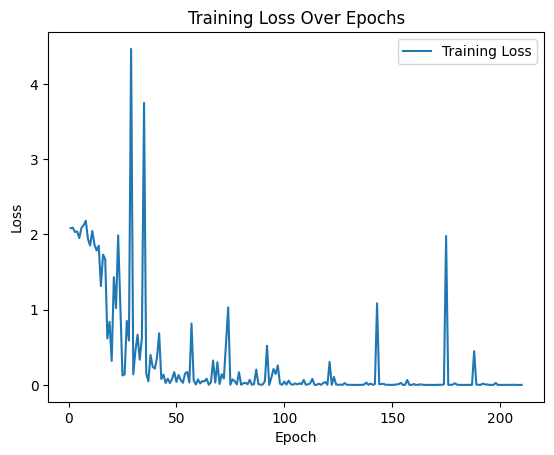

In [ ]:
N_EPOCHS = len(trloss_val)

# Plotting the training loss
plt.plot(range(1, N_EPOCHS + 1), trloss_val, label='Training Loss')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


###Movinet with  No stream Buffer Checkpoint (ใช้อันนี้เทรน) A2


In [ ]:
N_EPOCHS = 6
# สร้างโมเดล MoViNet
model_A2 = MoViNet(_C.MODEL.MoViNetA2, causal=False, pretrained=True)
start_time = time.time()

# เตรียม list เพื่อเก็บค่า loss ของการฝึกอบรม
trloss_val, tsloss_val = [], []

# ปรับแต่งชั้น classifier ของโมเดล
model_A2.classifier[3] = torch.nn.Conv3d(2048, 8, (1, 1, 1))

# กำหนด optimizer
optimizer = optim.Adam(model_A2.parameters(), lr=0.00005)

# วน loop ตามจำนวน epoch ที่กำหนด
for epoch in range(1, N_EPOCHS + 1):
    print('Epoch:', epoch)

    # ทำการฝึกอบรมและบันทึกค่า loss
    loss = train_iter(model_A2, optimizer, train_loader_A2, trloss_val)

    # บันทึก checkpoint
    checkpoint_path = 'A2_checkpoint_epoch_round1{}.pth'.format(epoch)
    torch.save({
        'epoch': epoch,
        'model_state_dict': model_A2.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss,
    }, checkpoint_path)

    # บันทึกโมเดลสุดท้าย
    if epoch == N_EPOCHS:
        torch.save(model_A2.state_dict(), 'A2_8class_yoru_Checkpoint_round1.pth')

print('Training Execution time:', '{:5.2f}'.format(time.time() - start_time), 'seconds')


In [ ]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from prettytable import PrettyTable

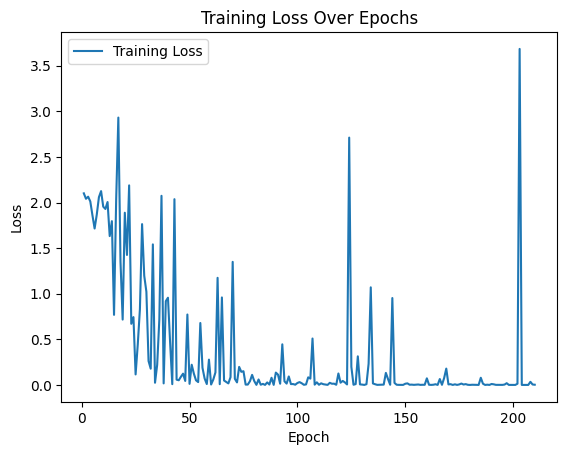

In [ ]:
N_EPOCHS = len(trloss_val)

# Plotting the training loss
plt.plot(range(1, N_EPOCHS + 1), trloss_val, label='Training Loss')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


###Movinet with  No stream Buffer Checkpoint (ใช้อันนี้เทรน) A3


In [ ]:
N_EPOCHS = 6
# สร้างโมเดล MoViNet
model_A3 = MoViNet(_C.MODEL.MoViNetA3, causal=False, pretrained=True)
start_time = time.time()

# เตรียม list เพื่อเก็บค่า loss ของการฝึกอบรม
trloss_val, tsloss_val = [], []

# ปรับแต่งชั้น classifier ของโมเดล
model_A3.classifier[3] = torch.nn.Conv3d(2048, 8, (1, 1, 1))

# กำหนด optimizer
optimizer = optim.Adam(model_A3.parameters(), lr=0.00005)

# วน loop ตามจำนวน epoch ที่กำหนด
for epoch in range(1, N_EPOCHS + 1):
    print('Epoch:', epoch)

    # ทำการฝึกอบรมและบันทึกค่า loss
    loss = train_iter(model_A3, optimizer, train_loader_A3, trloss_val)

    # บันทึก checkpoint
    checkpoint_path = 'A3_checkpoint_epoch_round1{}.pth'.format(epoch)
    torch.save({
        'epoch': epoch,
        'model_state_dict': model_A3.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss,
    }, checkpoint_path)

    # บันทึกโมเดลสุดท้าย
    if epoch == N_EPOCHS:
        torch.save(model_A3.state_dict(), 'A3_8class_yoru_Checkpoint_round1.pth')

print('Training Execution time:', '{:5.2f}'.format(time.time() - start_time), 'seconds')


Downloading: "https://github.com/Atze00/MoViNet-pytorch/blob/main/weights/modelA3_statedict_v3?raw=true" to /root/.cache/torch/hub/checkpoints/modelA3_statedict_v3
100%|██████████| 28.7M/28.7M [00:00<00:00, 388MB/s]


Epoch: 1


/usr/local/lib/python3.10/dist-packages/torchvision/io/video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


[    0/ 1718 (  0%)]  Loss: 2.0792
[   50/ 1718 (  3%)]  Loss: 2.0960
[  100/ 1718 (  6%)]  Loss: 2.0632
[  150/ 1718 (  9%)]  Loss: 2.0685
[  200/ 1718 ( 12%)]  Loss: 2.0630
[  250/ 1718 ( 15%)]  Loss: 2.1065
[  300/ 1718 ( 17%)]  Loss: 1.8782
[  350/ 1718 ( 20%)]  Loss: 1.9915
[  400/ 1718 ( 23%)]  Loss: 1.9917
[  450/ 1718 ( 26%)]  Loss: 1.8629
[  500/ 1718 ( 29%)]  Loss: 1.4838
[  550/ 1718 ( 32%)]  Loss: 1.4850
[  600/ 1718 ( 35%)]  Loss: 1.5666
[  650/ 1718 ( 38%)]  Loss: 0.5329
[  700/ 1718 ( 41%)]  Loss: 0.9394
[  750/ 1718 ( 44%)]  Loss: 1.1080
[  800/ 1718 ( 47%)]  Loss: 0.4560
[  850/ 1718 ( 49%)]  Loss: 0.8025
[  900/ 1718 ( 52%)]  Loss: 1.4995
[  950/ 1718 ( 55%)]  Loss: 0.4312
[ 1000/ 1718 ( 58%)]  Loss: 0.3792
[ 1050/ 1718 ( 61%)]  Loss: 1.0326
[ 1100/ 1718 ( 64%)]  Loss: 0.0961
[ 1150/ 1718 ( 67%)]  Loss: 0.1326
[ 1200/ 1718 ( 70%)]  Loss: 0.0865
[ 1250/ 1718 ( 73%)]  Loss: 0.1471
[ 1300/ 1718 ( 76%)]  Loss: 0.0647
[ 1350/ 1718 ( 79%)]  Loss: 0.0644
[ 1400/ 1718 ( 81%)]

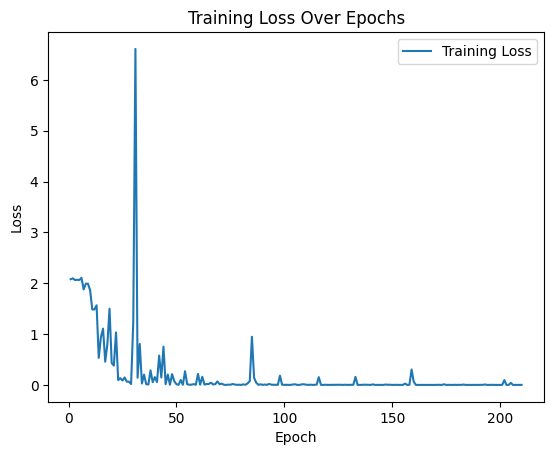

In [ ]:
import matplotlib.pyplot as plt
N_EPOCHS = len(trloss_val)

# Plotting the training loss
plt.plot(range(1, N_EPOCHS + 1), trloss_val, label='Training Loss')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


###Movinet with  No stream Buffer Checkpoint (ใช้อันนี้เทรน) A4



In [ ]:
N_EPOCHS = 12
# สร้างโมเดล MoViNet
model_A4 = MoViNet(_C.MODEL.MoViNetA4, causal=False, pretrained=True)
start_time = time.time()

# เตรียม list เพื่อเก็บค่า loss ของการฝึกอบรม
trloss_val, tsloss_val = [], []

# ปรับแต่งชั้น classifier ของโมเดล
model_A4.classifier[3] = torch.nn.Conv3d(2048, 8, (1, 1, 1))

# กำหนด optimizer
optimizer = optim.Adam(model_A4.parameters(), lr=0.00005)

# วน loop ตามจำนวน epoch ที่กำหนด
for epoch in range(1, N_EPOCHS + 1):
    print('Epoch:', epoch)

    # ทำการฝึกอบรมและบันทึกค่า loss
    loss = train_iter(model_A4, optimizer, train_loader_A4, trloss_val)

    # บันทึก checkpoint
    checkpoint_path = 'A4_yoru+habor_checkpoint_epoch_round1{}.pth'.format(epoch)
    torch.save({
        'epoch': epoch,
        'model_state_dict': model_A4.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss,
    }, checkpoint_path)

    # บันทึกโมเดลสุดท้าย
    if epoch == N_EPOCHS:
        torch.save(model_A4.state_dict(), 'A4_yoru+habor_8class_yoru_Checkpoint_round1.pth')

print('Training Execution time:', '{:5.2f}'.format(time.time() - start_time), 'seconds')


Downloading: "https://github.com/Atze00/MoViNet-pytorch/blob/main/weights/modelA4_statedict_v3?raw=true" to /root/.cache/torch/hub/checkpoints/modelA4_statedict_v3
100%|██████████| 44.0M/44.0M [00:00<00:00, 63.7MB/s]


Epoch: 1


/usr/local/lib/python3.10/dist-packages/torchvision/io/video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


[    0/ 1749 (  0%)]  Loss: 2.0986
[   50/ 1749 (  3%)]  Loss: 2.0719
[  100/ 1749 (  6%)]  Loss: 2.0555
[  150/ 1749 (  9%)]  Loss: 2.0964
[  200/ 1749 ( 11%)]  Loss: 1.9620
[  250/ 1749 ( 14%)]  Loss: 1.8506
[  300/ 1749 ( 17%)]  Loss: 1.1351
[  350/ 1749 ( 20%)]  Loss: 1.5061
[  400/ 1749 ( 23%)]  Loss: 1.4709
[  450/ 1749 ( 26%)]  Loss: 0.6464
[  500/ 1749 ( 29%)]  Loss: 0.9588
[  550/ 1749 ( 31%)]  Loss: 0.3395
[  600/ 1749 ( 34%)]  Loss: 0.4317
[  650/ 1749 ( 37%)]  Loss: 1.5610
[  700/ 1749 ( 40%)]  Loss: 0.0644
[  750/ 1749 ( 43%)]  Loss: 0.0764
[  800/ 1749 ( 46%)]  Loss: 0.3997
[  850/ 1749 ( 49%)]  Loss: 0.1165
[  900/ 1749 ( 51%)]  Loss: 0.1708
[  950/ 1749 ( 54%)]  Loss: 0.0641
[ 1000/ 1749 ( 57%)]  Loss: 0.0369
[ 1050/ 1749 ( 60%)]  Loss: 0.0250
[ 1100/ 1749 ( 63%)]  Loss: 0.2536
[ 1150/ 1749 ( 66%)]  Loss: 0.0143
[ 1200/ 1749 ( 69%)]  Loss: 0.3855
[ 1250/ 1749 ( 71%)]  Loss: 0.0191
[ 1300/ 1749 ( 74%)]  Loss: 0.0442
[ 1350/ 1749 ( 77%)]  Loss: 0.0960
[ 1400/ 1749 ( 80%)]

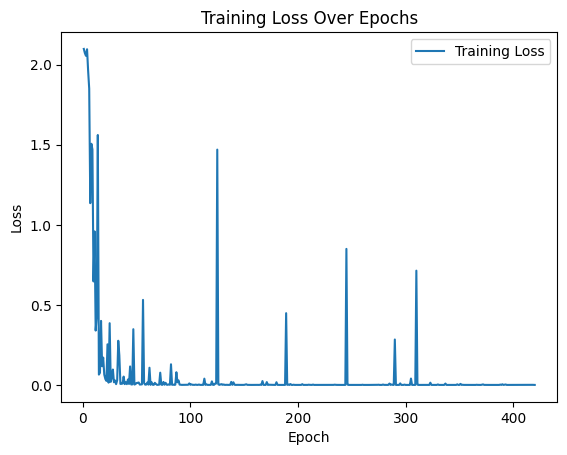

In [ ]:
import matplotlib.pyplot as plt
N_EPOCHS = len(trloss_val)

# Plotting the training loss
plt.plot(range(1, N_EPOCHS + 1), trloss_val, label='Training Loss')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


###Movinet with  No stream Buffer Checkpoint (ใช้อันนี้เทรน) A5


In [ ]:
N_EPOCHS = 12
# สร้างโมเดล MoViNet
model_A5 = MoViNet(_C.MODEL.MoViNetA5, causal=False, pretrained=True)
start_time = time.time()

# เตรียม list เพื่อเก็บค่า loss ของการฝึกอบรม
trloss_val, tsloss_val = [], []

# ปรับแต่งชั้น classifier ของโมเดล
model_A5.classifier[3] = torch.nn.Conv3d(2048, 8, (1, 1, 1))

# กำหนด optimizer
optimizer = optim.Adam(model_A5.parameters(), lr=0.00005)

# วน loop ตามจำนวน epoch ที่กำหนด
for epoch in range(1, N_EPOCHS + 1):
    print('Epoch:', epoch)

    # ทำการฝึกอบรมและบันทึกค่า loss
    loss = train_iter(model_A5, optimizer, train_loader_A5, trloss_val)

    # บันทึก checkpoint
    checkpoint_path = 'A5_yoru+habor_3_Checkpoint_epoch_round1{}.pth'.format(epoch)
    torch.save({
        'epoch': epoch,
        'model_state_dict': model_A5.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss,
    }, checkpoint_path)

    # บันทึกโมเดลสุดท้าย
    if epoch == N_EPOCHS:
        torch.save(model_A5.state_dict(), 'A5_yoru+habor_3_Checkpoint_round1.pth')

print('Training Execution time:', '{:5.2f}'.format(time.time() - start_time), 'seconds')


Epoch: 1
[    0/ 1480 (  0%)]  Loss: 2.0567
[   50/ 1480 (  3%)]  Loss: 2.0422
[  100/ 1480 (  7%)]  Loss: 2.1074
[  150/ 1480 ( 10%)]  Loss: 2.0621
[  200/ 1480 ( 14%)]  Loss: 1.9419
[  250/ 1480 ( 17%)]  Loss: 1.9349
[  300/ 1480 ( 20%)]  Loss: 1.5538
[  350/ 1480 ( 24%)]  Loss: 1.7887
[  400/ 1480 ( 27%)]  Loss: 0.3664
[  450/ 1480 ( 30%)]  Loss: 1.2976
[  500/ 1480 ( 34%)]  Loss: 1.4335
[  550/ 1480 ( 37%)]  Loss: 1.6296
[  600/ 1480 ( 41%)]  Loss: 0.8311
[  650/ 1480 ( 44%)]  Loss: 1.3224
[  700/ 1480 ( 47%)]  Loss: 0.8487
[  750/ 1480 ( 51%)]  Loss: 0.8568
[  800/ 1480 ( 54%)]  Loss: 0.2422
[  850/ 1480 ( 57%)]  Loss: 0.1600
[  900/ 1480 ( 61%)]  Loss: 0.0897
[  950/ 1480 ( 64%)]  Loss: 0.0751
[ 1000/ 1480 ( 68%)]  Loss: 3.7138
[ 1050/ 1480 ( 71%)]  Loss: 0.1478
[ 1100/ 1480 ( 74%)]  Loss: 0.0362
[ 1150/ 1480 ( 78%)]  Loss: 0.0451
[ 1200/ 1480 ( 81%)]  Loss: 0.1184
[ 1250/ 1480 ( 84%)]  Loss: 4.6249
[ 1300/ 1480 ( 88%)]  Loss: 1.0877
[ 1350/ 1480 ( 91%)]  Loss: 0.9409
[ 1400/ 148

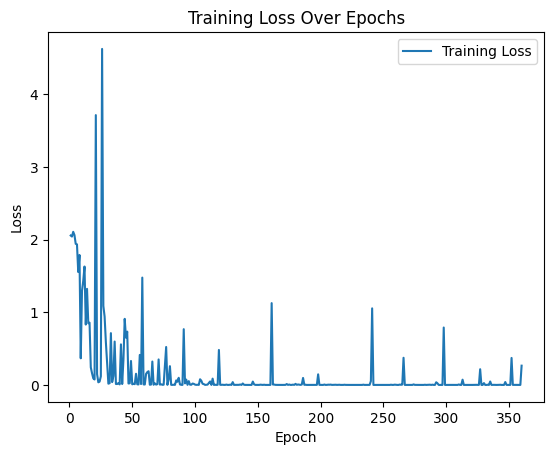

In [ ]:
import matplotlib.pyplot as plt
N_EPOCHS = len(trloss_val)

# Plotting the training loss
plt.plot(range(1, N_EPOCHS + 1), trloss_val, label='Training Loss')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


### Evaluate


In [ ]:
def evaluate1(model, data_load, loss_val, device):
    model.eval()

    samples = len(data_load.dataset)
    csamp = 0
    tloss = 0
    model.clean_activation_buffers()
    with torch.no_grad():
        for data, _, target in data_load:
            # Move data and target to the same device as the model
            data, target = data.to(device), target.to(device)

            output = F.log_softmax(model(data), dim=1)
            loss = F.nll_loss(output, target, reduction='sum')
            _, pred = torch.max(output, dim=1)

            tloss += loss.item()
            csamp += pred.eq(target).sum()
            model.clean_activation_buffers()
    aloss = tloss / samples
    loss_val.append(aloss)
    print('\nAverage test loss: ' + '{:.4f}'.format(aloss) +
          '  Accuracy:' + '{:5}'.format(csamp) + '/' +
          '{:5}'.format(samples) + ' (' +
          '{:4.2f}'.format(100.0 * csamp / samples) + '%)\n')

In [ ]:
from sklearn.metrics import confusion_matrix
trloss_val, tsloss_val = [], []
device = next(model_A5.parameters()).device
evaluate1(model_A5, test_loader_A5, trloss_val, device)


Average test loss: 1.2774  Accuracy:  562/  683 (82.28%)



## Predict

In [ ]:
device = next(model_A5.parameters()).device
true_labels, predicted_labels = [], []
with torch.no_grad():
    for data, _, target in test_loader_A5:
        # Move data and target to the same device as the model
        data, target = data.to(device), target.to(device)

        output = F.log_softmax(model_A5(data), dim=1)
        _, predicted = torch.max(output, dim=1)

        true_labels.extend(target.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from prettytable import PrettyTable


In [ ]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels));

In [ ]:
# Assuming binary classification (positive and negative)
positive_class_index = 1  # Index of the positive class in your class_names list

# Extract relevant values from the confusion matrix
true_positive = conf_matrix[positive_class_index, positive_class_index]
false_positive = conf_matrix[:, positive_class_index].sum() - true_positive
false_negative = conf_matrix[positive_class_index, :].sum() - true_positive
true_negative = conf_matrix.sum() - (true_positive + false_positive + false_negative)

# Create a PrettyTable
table = PrettyTable(["", "Predicted Positive", "Predicted Negative", "Total"])
table.add_row(["Actual Positive", true_positive, false_negative, true_positive + false_negative])
table.add_row(["Actual Negative", false_positive, true_negative, false_positive + true_negative])
table.add_row(["Total", true_positive + false_positive, false_negative + true_negative, conf_matrix.sum()])

# Print the table
print(table)


In [ ]:
class_names = hmdb51_test_A5.classes
class_names_test = class_names
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_test, yticklabels=class_names_test)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# สมมติว่าคุณคำนวณ true_labels และ predicted_labels มาแล้ว

# คำนวณค่า precision, recall, f1-score และ accuracy สำหรับแต่ละคลาส
precision_per_class = precision_score(true_labels, predicted_labels, average=None)
recall_per_class = recall_score(true_labels, predicted_labels, average=None)
f1_per_class = f1_score(true_labels, predicted_labels, average=None)
accuracy_per_class = accuracy_score(true_labels, predicted_labels)

# สร้าง PrettyTable
table = PrettyTable(["Class", "Precision", "Recall", "F1-Score", "Accuracy"])

# เพิ่มแถวลงในตารางสำหรับแต่ละคลาส
for class_label, precision, recall, f1 in zip(range(len(precision_per_class)), precision_per_class, recall_per_class, f1_per_class):
    table.add_row([f"Class {class_label}", f"{precision:.4f}", f"{recall:.4f}", f"{f1:.4f}", ""])

# เพิ่มแถวสำหรับ accuracy ของทั้งหมด
table.add_row(["Overall", "", "", "", f"{accuracy_per_class:.4f}"])

# แสดงตาราง
print(table)


# Train Model ต่อแบบเพิ่มรอบ (ใช้)

##train

In [ ]:
def train_iter(model, optimz, data_load, loss_val):
    samples = len(data_load.dataset)
    model.train()
    model.cuda()
    model.clean_activation_buffers()
    optimz.zero_grad()
    for i, (data,_ , target) in enumerate(data_load):
        out = F.log_softmax(model(data.cuda()), dim=1)
        loss = F.nll_loss(out, target.cuda())
        loss.backward()
        optimz.step()
        optimz.zero_grad()
        model.clean_activation_buffers()
        if i % 50 == 0:
            print('[' +  '{:5}'.format(i * len(data)) + '/' + '{:5}'.format(samples) +
                  ' (' + '{:3.0f}'.format(100 * i / len(data_load)) + '%)]  Loss: ' +
                  '{:6.4f}'.format(loss.item()))
            loss_val.append(loss.item())

In [ ]:
loaded_model_A2 = MoViNet(_C.MODEL.MoViNetA2, causal=False, pretrained=True)
loaded_model_A2.classifier[3] = torch.nn.Conv3d(2048, 8, (1, 1, 1))
# ระบุ path ของ checkpoint ที่คุณต้องการโหลด
best_checkpoint_path = '/content/drive/MyDrive/Game analysis/Video/Vdo_model/Model Yoru Checkpoint/A2/A2_checkpoint_epoch_rounde25.pth'

# Load checkpoint
best_checkpoint = torch.load(best_checkpoint_path)

# Load model state dictionary
loaded_model_A2.load_state_dict(best_checkpoint['model_state_dict'])

# ทดสอบโมเดล
loaded_model_A2.eval()


###Train

In [ ]:
N_EPOCHS = 6

# สร้างโมเดล MoViNet
start_time = time.time()
# เตรียม list เพื่อเก็บค่า loss ของการฝึกอบรม
trloss_val, tsloss_val = [], []
# ปรับแต่งชั้น classifier ของโมเดล
loaded_model.classifier[3] = torch.nn.Conv3d(2048, 8, (1, 1, 1))
# กำหนด optimizer
optimizer = optim.Adam(loaded_model.parameters(), lr=0.00005)
# วน loop ตามจำนวน epoch ที่กำหนด
for epoch in range(1, N_EPOCHS + 1):
    print('Epoch:', epoch)

    # ทำการฝึกอบรมและบันทึกค่า loss
    loss = train_iter(loaded_model, optimizer, train_loader_A4, trloss_val)

    # บันทึก checkpoint
    checkpoint_path = 'A4_checkpoint_epoch_rounde2{}.pth'.format(epoch)
    torch.save({
        'epoch': epoch,
        'model_state_dict': loaded_model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss,
    }, checkpoint_path)

    # บันทึกโมเดลสุดท้าย
    if epoch == N_EPOCHS:
        torch.save(loaded_model.state_dict(), 'A4_model8class_yoru_Checkpoint_round2.pth')

print('Training Execution time:', '{:5.2f}'.format(time.time() - start_time), 'seconds')


##Graph loss (ใช้)

In [ ]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report


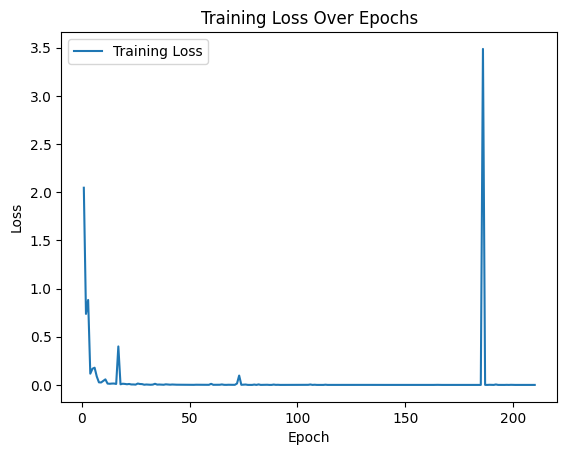

In [ ]:
import matplotlib.pyplot as plt
N_EPOCHS = len(trloss_val)

# Plotting the training loss
plt.plot(range(1, N_EPOCHS + 1), trloss_val, label='Training Loss')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


##Evaluate (ใช้)

In [ ]:
def evaluate1(model, data_load, loss_val, device):
    model.eval()

    samples = len(data_load.dataset)
    csamp = 0
    tloss = 0
    model.clean_activation_buffers()
    with torch.no_grad():
        for data, _, target in data_load:
            # Move data and target to the same device as the model
            data, target = data.to(device), target.to(device)

            output = F.log_softmax(model(data), dim=1)
            loss = F.nll_loss(output, target, reduction='sum')
            _, pred = torch.max(output, dim=1)

            tloss += loss.item()
            csamp += pred.eq(target).sum()
            model.clean_activation_buffers()
    aloss = tloss / samples
    loss_val.append(aloss)
    print('\nAverage test loss: ' + '{:.4f}'.format(aloss) +
          '  Accuracy:' + '{:5}'.format(csamp) + '/' +
          '{:5}'.format(samples) + ' (' +
          '{:4.2f}'.format(100.0 * csamp / samples) + '%)\n')

In [ ]:
from sklearn.metrics import confusion_matrix
trloss_val, tsloss_val = [], []
device = next(loaded_model.parameters()).device
evaluate1(loaded_model, test_loader, trloss_val, device)

##Predict (ใช้)

In [ ]:
device = next(loaded_model_A2.parameters()).device
true_labels, predicted_labels = [], []
with torch.no_grad():
    for data, _, target in test_loader_A2:
        # Move data and target to the same device as the model
        data, target = data.to(device), target.to(device)

        output = F.log_softmax(loaded_model_A2(data), dim=1)
        _, predicted = torch.max(output, dim=1)

        true_labels.extend(target.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

/usr/local/lib/python3.10/dist-packages/torchvision/io/video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


In [ ]:
from collections import Counter
label_counts = Counter(predicted_labels)
print("Label Counts:", label_counts)

Label Counts: Counter({3: 365, 1: 151, 5: 86, 4: 84, 7: 24, 6: 5, 0: 3, 2: 1})


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

In [ ]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[  2   8   0  76   0   4   0   0]
 [  0  74   0  13   3   0   0   0]
 [  1  48   0 129   0   0   3  13]
 [  0   1   0  87   1   0   0   1]
 [  0   0   0   3  80   0   0   0]
 [  0   0   0   2   0  82   0   1]
 [  0   0   0   0   0   0   0   0]
 [  0  20   1  55   0   0   2   9]]


In [ ]:
  from sklearn.metrics import classification_report

  # Print classification report
  print("Classification Report:")
  print(classification_report(true_labels, predicted_labels));

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.02      0.04        90
           1       0.49      0.82      0.61        90
           2       0.00      0.00      0.00       194
           3       0.24      0.97      0.38        90
           4       0.95      0.96      0.96        83
           5       0.95      0.96      0.96        85
           6       0.00      0.00      0.00         0
           7       0.38      0.10      0.16        87

    accuracy                           0.46       719
   macro avg       0.46      0.48      0.39       719
weighted avg       0.44      0.46      0.37       719



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
class_names = hmdb51_test_A2.classes
num_classes = len(class_names)
print("Number of Classes:", num_classes)
print(class_names)

Number of Classes: 8
['Buy_Action', 'Class 0 Action', 'Class Jett_skill Action', 'Dead_Action', 'Defuse Action', 'Orb Action', 'Plant Action', 'Shoot Action']


In [ ]:
from prettytable import PrettyTable

# Assuming binary classification (positive and negative)
positive_class_index = 1  # Index of the positive class in your class_names list

# Extract relevant values from the confusion matrix
true_positive = conf_matrix[positive_class_index, positive_class_index]
false_positive = conf_matrix[:, positive_class_index].sum() - true_positive
false_negative = conf_matrix[positive_class_index, :].sum() - true_positive
true_negative = conf_matrix.sum() - (true_positive + false_positive + false_negative)

# Create a PrettyTable
table = PrettyTable(["", "Predicted Positive", "Predicted Negative", "Total"])
table.add_row(["Actual Positive", true_positive, false_negative, true_positive + false_negative])
table.add_row(["Actual Negative", false_positive, true_negative, false_positive + true_negative])
table.add_row(["Total", true_positive + false_positive, false_negative + true_negative, conf_matrix.sum()])

# Print the table
print(table)


+-----------------+--------------------+--------------------+-------+
|                 | Predicted Positive | Predicted Negative | Total |
+-----------------+--------------------+--------------------+-------+
| Actual Positive |         74         |         16         |   90  |
| Actual Negative |         77         |        552         |  629  |
|      Total      |        151         |        568         |  719  |
+-----------------+--------------------+--------------------+-------+


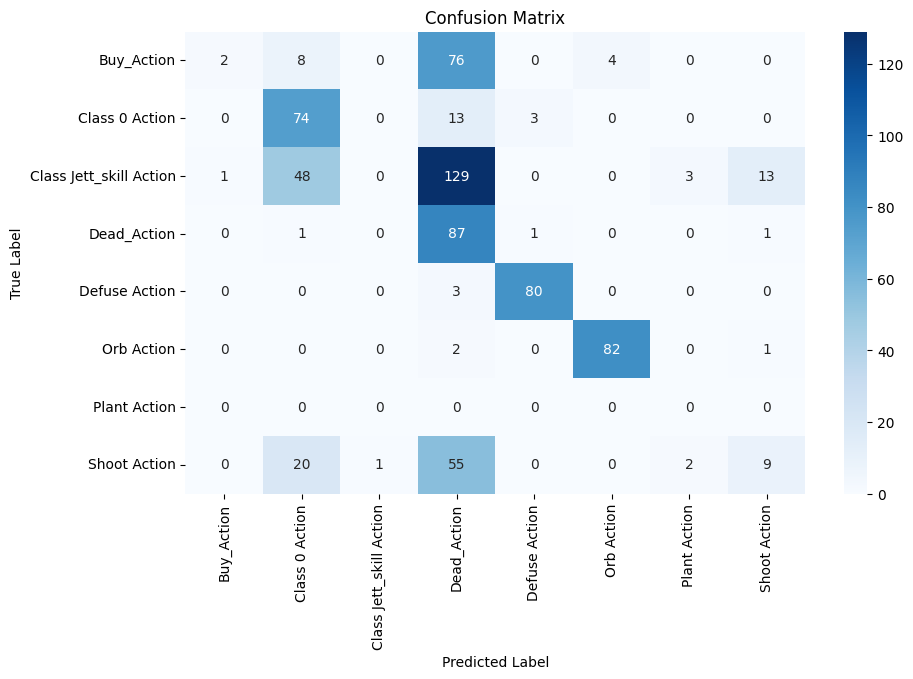

In [ ]:
class_names_test = class_names
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_test, yticklabels=class_names_test)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# สมมติว่าคุณคำนวณ true_labels และ predicted_labels มาแล้ว

# คำนวณค่า precision, recall, f1-score และ accuracy สำหรับแต่ละคลาส
precision_per_class = precision_score(true_labels, predicted_labels, average=None)
recall_per_class = recall_score(true_labels, predicted_labels, average=None)
f1_per_class = f1_score(true_labels, predicted_labels, average=None)
accuracy_per_class = accuracy_score(true_labels, predicted_labels)

# สร้าง PrettyTable
table = PrettyTable(["Class", "Precision", "Recall", "F1-Score", "Accuracy"])

# เพิ่มแถวลงในตารางสำหรับแต่ละคลาส
for class_label, precision, recall, f1 in zip(range(len(precision_per_class)), precision_per_class, recall_per_class, f1_per_class):
    table.add_row([f"Class {class_label}", f"{precision:.4f}", f"{recall:.4f}", f"{f1:.4f}", ""])

# เพิ่มแถวสำหรับ accuracy ของทั้งหมด
table.add_row(["Overall", "", "", "", f"{accuracy_per_class:.4f}"])

# แสดงตาราง
print(table)


+---------+-----------+--------+----------+----------+
|  Class  | Precision | Recall | F1-Score | Accuracy |
+---------+-----------+--------+----------+----------+
| Class 0 |   0.6667  | 0.0222 |  0.0430  |          |
| Class 1 |   0.4901  | 0.8222 |  0.6141  |          |
| Class 2 |   0.0000  | 0.0000 |  0.0000  |          |
| Class 3 |   0.2384  | 0.9667 |  0.3824  |          |
| Class 4 |   0.9524  | 0.9639 |  0.9581  |          |
| Class 5 |   0.9535  | 0.9647 |  0.9591  |          |
| Class 6 |   0.0000  | 0.0000 |  0.0000  |          |
| Class 7 |   0.3750  | 0.1034 |  0.1622  |          |
| Overall |           |        |          |  0.4645  |
+---------+-----------+--------+----------+----------+


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Other ไม่สำคัญ

In [ ]:
# Assuming your model is named 'loaded_model'
output_layer = loaded_model.classifier[3]
class_names = hmdb51_test.classes

# Assuming the output layer is a convolutional layer
num_classes = output_layer.out_channels

print("Number of Classes:", num_classes)
print("Class Names:", class_names)


Number of Classes: 8
Class Names: ['Buy_Action', 'Class 0 Action', 'Class Sage_skill Action', 'Dead_Action', 'Defuse Action', 'Orb Action', 'Plant Action', 'Shoot_Action']


#Test new data หลัง Train ให้มาใช้ Section นี้เลย


###Load model

In [ ]:
loaded_model1 = MoViNet(_C.MODEL.MoViNetA5, causal=False, pretrained=True)
loaded_model1.classifier[3] = torch.nn.Conv3d(2048, 8, (1, 1, 1))
# ระบุ path ของ checkpoint ที่คุณต้องการโหลด
best_checkpoint_path = '/content/drive/MyDrive/Game analysis/Video/Vdo_model/Model Yoru Checkpoint/A5 Yoru+habor/A5_yoru+habor_Checkpoint_epoch_round112.pth'

# Load checkpoint
best_checkpoint = torch.load(best_checkpoint_path)

# Load model state dictionary
loaded_model1.load_state_dict(best_checkpoint['model_state_dict'])

# ทดสอบโมเดล
loaded_model1.eval()


In [ ]:
# Define the model architecture
loaded_model1 = MoViNet(_C.MODEL.MoViNetA5, causal=False, pretrained=True)
loaded_model1.classifier[3] = torch.nn.Conv3d(2048, 8, (1, 1, 1))

# Specify the path to the checkpoint file
best_checkpoint_path = '/content/drive/MyDrive/Game analysis/Video/Vdo_model/Model/Model Habor/A5_checkpoint_epoch_rounde64.pth'

# Load the checkpoint, specifying map_location to CPU
best_checkpoint = torch.load(best_checkpoint_path, map_location=torch.device('cpu'))

# Load the model's state dictionary
loaded_model1.load_state_dict(best_checkpoint['model_state_dict'])

# Set the model to evaluation mode
loaded_model1.eval()


In [ ]:
torch.manual_seed(97)
num_frames = 24 # 16
clip_steps = 12
Bs_Train = 1
Bs_Test = 1

transform_test_A5 = transforms.Compose([
                                 T.ToFloatTensorInZeroOne(),
                                 T.Resize((400, 400)),
                                 #T.Normalize(mean=[0.43216, 0.394666, 0.37645], std=[0.22803, 0.22145, 0.216989]),
                                 T.CenterCrop((320, 320))]) #Size for model


hmdb51_test_A5 = torchvision.datasets.HMDB51('/content/drive/MyDrive/Game analysis/Project Harbor/video_data', '/content/drive/MyDrive/Game analysis/Project Harbor/test_train_splits',
                                              frames_per_clip=24,frame_rate=24,step_between_clips = clip_steps, fold=1, train=False,transform=transform_test_A5, num_workers=2)

test_loader_A5  = DataLoader(hmdb51_test_A5 , batch_size=Bs_Test, shuffle=False)

100%|██████████| 51/51 [08:13<00:00,  9.67s/it]
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/video_utils.py:219: UserWarning: There aren't enough frames in the current video to get a clip for the given clip length and frames between clips. The video (and potentially others) will be skipped.
  warnings.warn(


In [ ]:
print(len(hmdb51_test_A5))

751


### Check dataset มีกี่ class, ชื่ออะไรบ้าง, ตั้งค่าให้ model เหลือ class ตรงกัน

In [ ]:
class_names = hmdb51_test_A5.classes
num_classes = len(class_names)

print("Number of Classes:", num_classes)
print("Class Names:", class_names)


Number of Classes: 8
Class Names: ['Buy', 'Death', 'Defuse', 'Free', 'Kill', 'Orb', 'Plant', 'Skill']


### test model with dataloder

In [ ]:
from sklearn.metrics import confusion_matrix
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import torch
from torch.utils.data import DataLoader
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
device = next(loaded_model1.parameters()).device
true_labels, predicted_labels = [], []
with torch.no_grad():
    for data, _, target in test_loader_A5:
        # Move data and target to the same device as the model
        data, target = data.to(device), target.to(device)

        output = F.log_softmax(loaded_model1(data), dim=1)
        _, predicted = torch.max(output, dim=1)

        true_labels.extend(target.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

/usr/local/lib/python3.10/dist-packages/torchvision/io/video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


In [ ]:
import pandas as pd

# สร้าง DataFrame จาก true_labels และ predicted_labels
df = pd.DataFrame({'true_label': true_labels, 'predicted_label': predicted_labels})

# บันทึก DataFrame เป็นไฟล์ CSV
df.to_csv('true_predict_A5_habor_habor.csv', index=False)

###Confusion matrix

In [ ]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 89   0   0   1   0   0   0   0]
 [  0 105   0   0   1   0   0   0]
 [  0   0  91   0   0   0   0   1]
 [  0   0   0  87   0   0   3   0]
 [  0   0   0   9  83   0   0   0]
 [  0   0   0   1   0  91   0   0]
 [  0   1   0   7   0   0  90   1]
 [  0   0   0   1   2   0   1  86]]


In [ ]:
from prettytable import PrettyTable

# Assuming binary classification (positive and negative)
positive_class_index = 1  # Index of the positive class in your class_names list

# Extract relevant values from the confusion matrix
true_positive = conf_matrix[positive_class_index, positive_class_index]
false_positive = conf_matrix[:, positive_class_index].sum() - true_positive
false_negative = conf_matrix[positive_class_index, :].sum() - true_positive
true_negative = conf_matrix.sum() - (true_positive + false_positive + false_negative)

# Create a PrettyTable
table = PrettyTable(["", "Predicted Positive", "Predicted Negative", "Total"])
table.add_row(["Actual Positive", true_positive, false_negative, true_positive + false_negative])
table.add_row(["Actual Negative", false_positive, true_negative, false_positive + true_negative])
table.add_row(["Total", true_positive + false_positive, false_negative + true_negative, conf_matrix.sum()])

# Print the table
print(table)


+-----------------+--------------------+--------------------+-------+
|                 | Predicted Positive | Predicted Negative | Total |
+-----------------+--------------------+--------------------+-------+
| Actual Positive |        105         |         1          |  106  |
| Actual Negative |         1          |        644         |  645  |
|      Total      |        106         |        645         |  751  |
+-----------------+--------------------+--------------------+-------+


In [ ]:
  # Print classification report
  print("Classification Report:")
  print(classification_report(true_labels, predicted_labels));

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        90
           1       0.99      0.99      0.99       106
           2       1.00      0.99      0.99        92
           3       0.82      0.97      0.89        90
           4       0.97      0.90      0.93        92
           5       1.00      0.99      0.99        92
           6       0.96      0.91      0.93        99
           7       0.98      0.96      0.97        90

    accuracy                           0.96       751
   macro avg       0.96      0.96      0.96       751
weighted avg       0.96      0.96      0.96       751



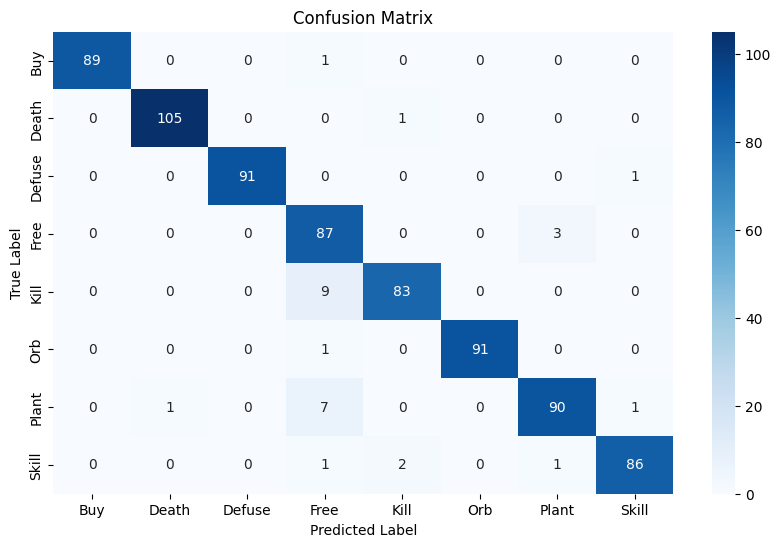

In [ ]:
#class_names_test = ['Buy_Action', 'Class 0 Action', 'Class Skill Action', 'Dead_Action', 'Defuse Action', 'Orb Action', 'Plant Action', 'Shoot Action']
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have true_labels and predicted_labels calculated

# Custom class labels
#class_labels =['Buy_Action', 'Class 0 Action', 'Class Skill Action', 'Dead_Action', 'Defuse Action', 'Orb Action', 'Plant Action', 'Shoot Action']
class_labels = class_names

# Calculate precision, recall, f1-score, and accuracy for each class
precision_per_class = precision_score(true_labels, predicted_labels, average=None)
recall_per_class = recall_score(true_labels, predicted_labels, average=None)
f1_per_class = f1_score(true_labels, predicted_labels, average=None)
accuracy_per_class = accuracy_score(true_labels, predicted_labels)

# Create PrettyTable
table = PrettyTable(["Class", "Precision", "Recall", "F1-Score", "Accuracy"])

# Add rows to the table for each class
for class_label, precision, recall, f1 in zip(class_labels, precision_per_class, recall_per_class, f1_per_class):
    table.add_row([class_label, f"{precision:.4f}", f"{recall:.4f}", f"{f1:.4f}", ""])

# Add a row for the overall accuracy
table.add_row(["Overall", "", "", "", f"{accuracy_per_class:.4f}"])

# Display the table
print(table)


+---------+-----------+--------+----------+----------+
|  Class  | Precision | Recall | F1-Score | Accuracy |
+---------+-----------+--------+----------+----------+
|   Buy   |   1.0000  | 0.9889 |  0.9944  |          |
|  Death  |   0.9906  | 0.9906 |  0.9906  |          |
|  Defuse |   1.0000  | 0.9891 |  0.9945  |          |
|   Free  |   0.8208  | 0.9667 |  0.8878  |          |
|   Kill  |   0.9651  | 0.9022 |  0.9326  |          |
|   Orb   |   1.0000  | 0.9891 |  0.9945  |          |
|  Plant  |   0.9574  | 0.9091 |  0.9326  |          |
|  Skill  |   0.9773  | 0.9556 |  0.9663  |          |
| Overall |           |        |          |  0.9614  |
+---------+-----------+--------+----------+----------+


#Predict ไม่ถูก (ไม่ใช้)

###Predict with CPU

In [ ]:
# Make predictions
with torch.no_grad():
    output1 = loaded_model(test_loader)

logits1= output1  # Replace this with your actual output tensor
probabilities = F.softmax(logits1, dim=1)

# Get the predicted class index and its probability
predicted_class, highest_probability = torch.max(probabilities, dim=1)

print("Highest Probability:", highest_probability.item())
print("Predicted Class:", predicted_class.item())


In [ ]:
# Iterate through the test loader
with torch.no_grad():
    for inputs, labels in test_loader:
        # Move inputs and labels to the device
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = loaded_model(inputs)

        # Get predicted labels
        _, preds = torch.max(outputs, 1)

        # Append true and predicted labels to the lists
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(preds.cpu().numpy())

###Predict with GPU

In [ ]:
# Make predictions
with torch.no_grad():
    output2 = loaded_model(frame_tensor)

logits2 = output2  # Replace this with your actual output tensor
probabilities = F.softmax(logits2, dim=1)

# Get the predicted class index and its probability
predicted_class_index = torch.argmax(output2).item()
predicted_class_name = class_index_to_name[predicted_class_index]
highest_probability = probabilities[0, predicted_class_index].item()

print(f'Predicted Class: {predicted_class_name}')
print(f'Highest Probability: {highest_probability:.2%}')


Predicted Class: Class Skill
Highest Probability: 27.29%


In [ ]:
num_classes = loaded_model.classifier[3].out_channels
print(f'Number of Classes: {num_classes}')


Number of Classes: 4


In [ ]:
# Assuming your model is named 'model'
final_layer_weight_size = loaded_model.classifier[3].weight.size()

# The number of classes is the first dimension of the weight matrix
num_classes = final_layer_weight_size[0]

print(f'Number of Classes: {num_classes}')


Number of Classes: 4


#Test confusion matrix

In [ ]:
file_path = "/content/drive/MyDrive/Game analysis/Video/Vdo_model/true_predict_A5_habor_habor.csv"
df = pd.read_csv(file_path)
df.columns

Index(['true_label', 'predicted_label'], dtype='object')

In [ ]:
class_names = hmdb51_test_A5.classes
print(class_names)

['Buy', 'Death', 'Defuse', 'Free', 'Kill', 'Orb', 'Plant', 'Skill']


In [ ]:
class_map = {
    'Buy': 'Buy_Action',
    'Free': 'Class_0_Action',
    'Skill': 'Class_Skill_Action',
    'Death': 'Dead_Action',
    'Defuse': 'Defuse_Action',
    'Orb': 'Orb_Action',
    'Plant': 'Plant_Action',
    'Kill': 'Shoot_Action'
}


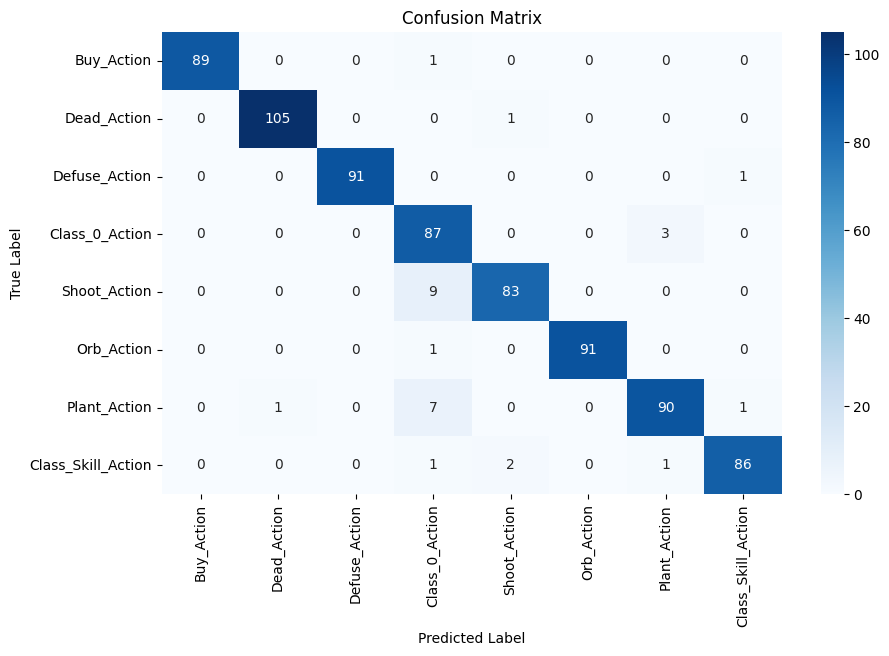

In [ ]:
file_path = "/content/drive/MyDrive/Game analysis/Video/Vdo_model/true_predict_A5_habor_habor.csv"

# อ่านไฟล์ CSV เข้า DataFrame
df = pd.read_csv(file_path)
class_names = hmdb51_test_A5.classes

# สร้าง confusion matrix
conf_matrix = confusion_matrix(df['true_label'], df['predicted_label'])
class_name2 =['Buy_Action', 'Dead_Action', 'Defuse_Action', 'Class_0_Action', 'Shoot_Action', 'Orb_Action', 'Plant_Action', 'Class_Skill_Action']


# กำหนดชื่อคลาสใหม่
  #modified_class_names = ['Buy_Action', 'Class_0_Action', 'Class_Skill_Action', 'Dead_Action', 'Defuse_Action', 'Orb_Action', 'Plant_Action', 'Shoot_Action']

# สร้าง DataFrame จาก confusion matrix และเรียงลำดับตามชื่อคลาสใหม่
  #conf_matrix_df = pd.DataFrame(conf_matrix, index=modified_class_names, columns=modified_class_names)
# สร้าง heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True,xticklabels=class_name2, yticklabels=class_name2,fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


##เปลี่ยนชื่อให้สวย


In [ ]:
file_path = "/content/drive/MyDrive/Game analysis/Video/Vdo_model/true_predict_A5_habor_habor.csv"
df = pd.read_csv(file_path)
# การแปลงชื่อคลาส
modified_names = {
    'Buy': 'Buy_Action',
    'Free': 'Class_0_Action',
    'Skill': 'Class_Skill_Action',
    'Death': 'Dead_Action',
    'Defuse': 'Defuse_Action',
    'Orb': 'Orb_Action',
    'Plant': 'Plant_Action',
    'Kill': 'Shoot_Action'
}

modified_class_names = [modified_names.get(class_name, class_name) for class_name in class_names]
print("Modified Class Names:", modified_class_names)

Modified Class Names: ['Buy_Action', 'Dead_Action', 'Defuse_Action', 'Class_0_Action', 'Shoot_Action', 'Orb_Action', 'Plant_Action', 'Class_Skill_Action']


##ชื่อ orignal

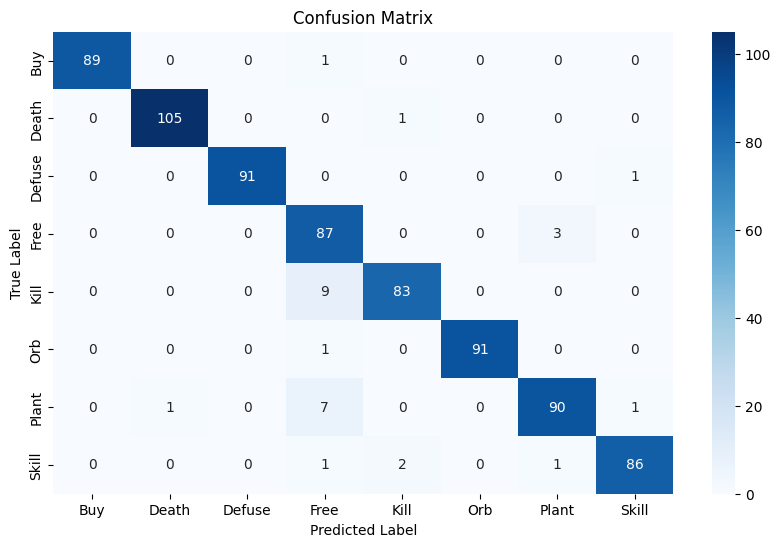

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# สร้าง confusion matrix
conf_matrix = confusion_matrix(df['true_label'], df['predicted_label'])

class_names = hmdb51_test_A5.classes

# สร้าง heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True,  xticklabels=class_names, yticklabels=class_names,fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


##plot อื่นๆ

In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))


Classification Report:


ValueError: unknown is not supported

In [ ]:
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ตั้งชื่อคลาสตามที่กำหนด
class_labels = hmdb51_test_A5.classes

# คำนวณ precision, recall, f1-score, และ accuracy สำหรับแต่ละคลาส
precision_per_class = precision_score(true_labels, predicted_labels, average=None)
recall_per_class = recall_score(true_labels, predicted_labels, average=None)
f1_per_class = f1_score(true_labels, predicted_labels, average=None)
accuracy_per_class = accuracy_score(true_labels, predicted_labels)

# สร้าง PrettyTable
table = PrettyTable(["Class", "Precision", "Recall", "F1-Score", "Accuracy"])

# เพิ่มแถวในตารางสำหรับแต่ละคลาส
for class_label, precision, recall, f1 in zip(modified_class_names, precision_per_class, recall_per_class, f1_per_class):
    table.add_row([class_label, f"{precision:.4f}", f"{recall:.4f}", f"{f1:.4f}", ""])


# เพิ่มแถวสำหรับค่าความแม่นยำโดยรวม
table.add_row(["Overall", "", "", "", f"{accuracy_per_class:.4f}"])

# แสดงตาราง
print(table)


+--------------------+-----------+--------+----------+----------+
|       Class        | Precision | Recall | F1-Score | Accuracy |
+--------------------+-----------+--------+----------+----------+
|     Buy_Action     |   1.0000  | 0.9889 |  0.9944  |          |
|   Class_0_Action   |   0.9906  | 0.9906 |  0.9906  |          |
| Class_Skill_Action |   1.0000  | 0.9891 |  0.9945  |          |
|    Dead_Action     |   0.8208  | 0.9667 |  0.8878  |          |
|   Defuse_Action    |   0.9651  | 0.9022 |  0.9326  |          |
|     Orb_Action     |   1.0000  | 0.9891 |  0.9945  |          |
|    Plant_Action    |   0.9574  | 0.9091 |  0.9326  |          |
|    Shoot_Action    |   0.9773  | 0.9556 |  0.9663  |          |
|      Overall       |           |        |          |  0.9614  |
+--------------------+-----------+--------+----------+----------+


In [ ]:
from sklearn.metrics import classification_report

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=modified_class_names))


Classification Report:
                    precision    recall  f1-score   support

        Buy_Action       1.00      0.99      0.99        90
    Class_0_Action       0.99      0.99      0.99       106
Class_Skill_Action       1.00      0.99      0.99        92
       Dead_Action       0.82      0.97      0.89        90
     Defuse_Action       0.97      0.90      0.93        92
        Orb_Action       1.00      0.99      0.99        92
      Plant_Action       0.96      0.91      0.93        99
      Shoot_Action       0.98      0.96      0.97        90

          accuracy                           0.96       751
         macro avg       0.96      0.96      0.96       751
      weighted avg       0.96      0.96      0.96       751



# Predict 1 Video else round

###Import

In [6]:
%cd /content/drive/MyDrive/Game analysis/Video/Vdo_model/video แบ่งรอบไม่ตัด/video_data
%ls

/content/drive/.shortcut-targets-by-id/1jusOl_HN_QQ9kYMlGXffiLoyy9tUOXuM/Game analysis/Video/Vdo_model/video แบ่งรอบไม่ตัด/video_data
test_video_cutvideo/  test_video_fullvideo/


###Install ffmpeg

In [ ]:
from IPython.display import clear_output
!sudo curl -L https://github.com/BtbN/FFmpeg-Builds/releases/download/latest/ffmpeg-master-latest-linux64-gpl.tar.xz -o /usr/local/bin/ffmpeg.tar.xz
clear_output()
%cd /usr/local/bin/
clear_output()
!7z e /usr/local/bin/ffmpeg.tar.xz
clear_output()
!7z e /usr/local/bin/ffmpeg.tar
clear_output()
!sudo chmod a+rx /usr/local/bin/ffmpeg
clear_output()
%cd /content/
!sudo curl -L https://mkvtoolnix.download/appimage/MKVToolNix_GUI-70.0.0-x86_64.AppImage -o /usr/local/bin/MKVToolNix_GUI-70.0.0-x86_64.AppImage
!sudo chmod u+rx /usr/local/bin/MKVToolNix_GUI-70.0.0-x86_64.AppImage
!sudo ln -s /usr/local/bin/MKVToolNix_GUI-70.0.0-x86_64.AppImage /usr/local/bin/mkvmerge
!sudo chmod a+rx /usr/local/bin/mkvmerge
clear_output()
!ffmpeg -version

In [14]:
import os
import subprocess

# กำหนด path ของวิดีโอที่ต้องการตัด
inputFile = "/content/drive/MyDrive/Game analysis/Video/Vdo_model/video แบ่งรอบไม่ตัด/video_data/test_video_fullvideo/[8-30-23][03.05-33.00] nosyy - yoru - rank immortal 1 - รอบ 1.avi"

# เรียกใช้ ffmpeg เพื่อรับข้อมูลเกี่ยวกับวิดีโอและคำนวณความยาวของมัน
command = ['ffmpeg', '-i', inputFile, '-f', 'null', '-']
result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
output = result.stdout.decode('utf-8')

# หาค่า duration จาก output
duration_index = output.find('Duration: ') + len('Duration: ')
duration = output[duration_index:duration_index+11]
duration = duration.split(':')
duration = int(duration[0])*3600 + int(duration[1])*60 + int(duration[2].split('.')[0])

# กำหนดความยาวของคลิปวิดีโอที่ต้องการตัด
clipDuration = 2  # คลิปวิดีโอละ 2 วินาที

# กำหนด path ที่ต้องการบันทึกไฟล์ผลลัพธ์
outputFolder = "/content/drive/MyDrive/Game analysis/Video/Vdo_model/video แบ่งรอบไม่ตัด/video_data/test_video_cutvideo/Immortal_1"

# คำนวณจำนวนคลิปวิดีโอที่ต้องการตัด
numClips = duration // clipDuration

# สร้างคำสั่ง FFMPEG สำหรับการตัดแต่ละคลิปวิดีโอ
for i in range(numClips):
    # คำนวณเวลาเริ่มต้นและสิ้นสุดของคลิปวิดีโอ
    startTime = i * clipDuration
    endTime = startTime + clipDuration

    # สร้าง command line สำหรับ FFMPEG
    commandLine = ['-hide_banner', '-i', inputFile, '-map', '0', '-c', 'copy', '-ss', "{:02d}:{:02d}:{:02d}".format(startTime // 3600, (startTime // 60) % 60, startTime % 60), '-to', "{:02d}:{:02d}:{:02d}".format(endTime // 3600, (endTime // 60) % 60, endTime % 60)]

    sourceName = os.path.splitext(os.path.basename(os.path.abspath(inputFile)))[0]
    sourceExtention = os.path.splitext(os.path.basename(os.path.abspath(inputFile)))[1]

    # กำหนด path ของไฟล์ผลลัพธ์
    outputFile = os.path.join(outputFolder, (sourceName + f'_clip{i+1}' + sourceExtention))
    commandLine += [outputFile]

    # ใช้ FFMPEG เพื่อตัดคลิปวิดีโอ
    subprocess.run(['ffmpeg'] + commandLine)


In [37]:
import os
import subprocess

# กำหนด path ของวิดีโอที่ต้องการตัด
inputFile = "/content/drive/MyDrive/Game analysis/Video/Vdo_model/video แบ่งรอบไม่ตัด/video_data/test_video_fullvideo/[8-30-23][03.05-33.00] nosyy - yoru - rank immortal 1 - รอบ 1.avi"

# เรียกใช้ ffmpeg เพื่อรับข้อมูลเกี่ยวกับวิดีโอและคำนวณความยาวของมัน
command = ['ffmpeg', '-i', inputFile, '-f', 'null', '-']
result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
output = result.stdout.decode('utf-8')

# หาค่า duration จาก output
duration_index = output.find('Duration: ') + len('Duration: ')
duration = output[duration_index:duration_index+11]
duration = duration.split(':')
duration = int(duration[0])*3600 + int(duration[1])*60 + int(duration[2].split('.')[0])

# กำหนดความยาวของคลิปวิดีโอที่ต้องการตัด
clipDuration = 2  # คลิปวิดีโอละ 2 วินาที

# กำหนด path ที่ต้องการบันทึกไฟล์ผลลัพธ์
outputFolder = "/content/drive/MyDrive/Game analysis/Video/Vdo_model/video แบ่งรอบไม่ตัด/video_data/test_video_cutvideo/Immortal_1"

# คำนวณจำนวนคลิปวิดีโอที่ต้องการตัด
numClips = duration // clipDuration

# สร้างคำสั่ง FFMPEG สำหรับการตัดแต่ละคลิปวิดีโอ
for i in range(numClips):
    # คำนวณเวลาเริ่มต้นและสิ้นสุดของคลิปวิดีโอ
    startTime = i * clipDuration
    endTime = startTime + clipDuration

    # สร้าง command line สำหรับ FFMPEG
    commandLine = ['-hide_banner', '-i', inputFile, '-map', '0', '-c', 'copy', '-ss', "{:02d}:{:02d}:{:02d}".format(startTime // 3600, (startTime // 60) % 60, startTime % 60), '-to', "{:02d}:{:02d}:{:02d}".format(endTime // 3600, (endTime // 60) % 60, endTime % 60)]

    # กำหนด path ของไฟล์ผลลัพธ์
    outputFile = os.path.join(outputFolder, f"video_test_{i+1}.avi")
    commandLine += [outputFile]

    # ใช้ FFMPEG เพื่อตัดคลิปวิดีโอ
    subprocess.run(['ffmpeg'] + commandLine)


In [34]:
import os

# กำหนด path ของโฟลเดอร์ที่มีวิดีโอ
folder_path = "/content/drive/MyDrive/Game analysis/Video/Vdo_model/video แบ่งรอบไม่ตัด/video_data/test_video_cutvideo/Immortal_1/"

# สร้างไฟล์ text
output_file_path = "/content/drive/MyDrive/Game analysis/Video/Vdo_model/video แบ่งรอบไม่ตัด/test_train_splits/Immortal_1_test_split1.txt"
with open(output_file_path, "w") as f:
    # วนลูปผ่านไฟล์ในโฟลเดอร์
    for i, filename in enumerate(os.listdir(folder_path), start=1):
        # ตรวจสอบว่าไฟล์เป็นไฟล์วิดีโอ (.avi) หรือไม่
        if filename.endswith(".avi"):
            # สร้างชื่อไฟล์ใหม่
            new_filename = f"video_test_{i}.avi 2\n"
            # เขียนชื่อไฟล์ใหม่ลงในไฟล์ text
            f.write(new_filename)


### Load Model & Load data

In [ ]:
# Define the model architecture
loaded_model1 = MoViNet(_C.MODEL.MoViNetA5, causal=False, pretrained=True)
loaded_model1.classifier[3] = torch.nn.Conv3d(2048, 8, (1, 1, 1))

# Specify the path to the checkpoint file
best_checkpoint_path = '/content/drive/MyDrive/Game analysis/Video/Vdo_model/Model/Model Yoru Checkpoint/A5_yoru+habor_Checkpoint_epoch_round112 (1).pth'

# Load the checkpoint, specifying map_location to CPU
best_checkpoint = torch.load(best_checkpoint_path, map_location=torch.device('cpu'))

# Load the model's state dictionary
loaded_model1.load_state_dict(best_checkpoint['model_state_dict'])

# Set the model to evaluation mode
loaded_model1.eval()


In [38]:
torch.manual_seed(97)
num_frames = 24 # 16
clip_steps = 12
Bs_Train = 1
Bs_Test = 1

transform_test_A5 = transforms.Compose([
                                 T.ToFloatTensorInZeroOne(),
                                 T.Resize((400, 400)),
                                 #T.Normalize(mean=[0.43216, 0.394666, 0.37645], std=[0.22803, 0.22145, 0.216989]),
                                 T.CenterCrop((320, 320))]) #Size for model


hmdb51_test_A5 = torchvision.datasets.HMDB51('/content/drive/MyDrive/Game analysis/Video/Vdo_model/video แบ่งรอบไม่ตัด/video_data/test_video_cutvideo/',
                                             '/content/drive/MyDrive/Game analysis/Video/Vdo_model/video แบ่งรอบไม่ตัด/test_train_splits//',
                                              frames_per_clip=24,frame_rate=24,step_between_clips = clip_steps, fold=1, train=False,transform=transform_test_A5, num_workers=2)

test_loader_A5  = DataLoader(hmdb51_test_A5 , batch_size=Bs_Test, shuffle=False)

100%|██████████| 4/4 [00:07<00:00,  1.94s/it]


In [39]:
print(hmdb51_test_A5)

Dataset HMDB51
    Number of datapoints: 109
    Root location: /content/drive/MyDrive/Game analysis/Video/Vdo_model/video แบ่งรอบไม่ตัด/video_data/test_video_cutvideo/


### Predict

In [40]:
from sklearn.metrics import confusion_matrix
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import torch
from torch.utils.data import DataLoader
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [41]:
device = next(loaded_model1.parameters()).device
true_labels, predicted_labels = [], []
with torch.no_grad():
    for data, _, target in test_loader_A5:
        # Move data and target to the same device as the model
        data, target = data.to(device), target.to(device)

        output = F.log_softmax(loaded_model1(data), dim=1)
        _, predicted = torch.max(output, dim=1)

        true_labels.extend(target.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

/usr/local/lib/python3.10/dist-packages/torchvision/io/video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


In [45]:
import pandas as pd
from google.colab import drive

# Mount Google Drive เพื่อให้สามารถเข้าถึงไดเรกทอรีบน Google Drive
drive.mount('/content/drive')

# สร้าง DataFrame จาก true_labels และ predicted_labels
df = pd.DataFrame({'true_label': true_labels, 'predicted_label': predicted_labels})

# บันทึก DataFrame เป็นไฟล์ CSV ในเส้นทางที่กำหนด
output_path = '/content/drive/MyDrive/Game analysis/Video/Vdo_model/video แบ่งรอบไม่ตัด/true_predict_A5_yoru+habor_with 1 round.csv'
df.to_csv(output_path, index=False)

# บันทึก DataFrame เป็นไฟล์ CSV
df.to_csv('true_predict_A5_yoru+habor_with 1 round.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import pandas as pd

# โหลดไฟล์ CSV เป็น DataFrame
file_path = '/content/drive/MyDrive/Game analysis/Video/Vdo_model/video แบ่งรอบไม่ตัด/true_predict_A5_yoru+habor_with 1 round.csv'
df = pd.read_csv(file_path)

# แสดง DataFrame
df

,true_label,predicted_label
0,0,0
1,0,0
2,0,0
3,0,7
4,0,7
...,...,...
104,0,0
105,0,0
106,0,0
107,0,0


In [49]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[76  1 11  4 17]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]


In [50]:
unique_predicted_labels = df['predicted_label'].unique()
print(unique_predicted_labels)


[0 7 6 2 1]


In [53]:
class_names = hmdb51_test_A5.classes
print(class_names)

['Immortal_1']


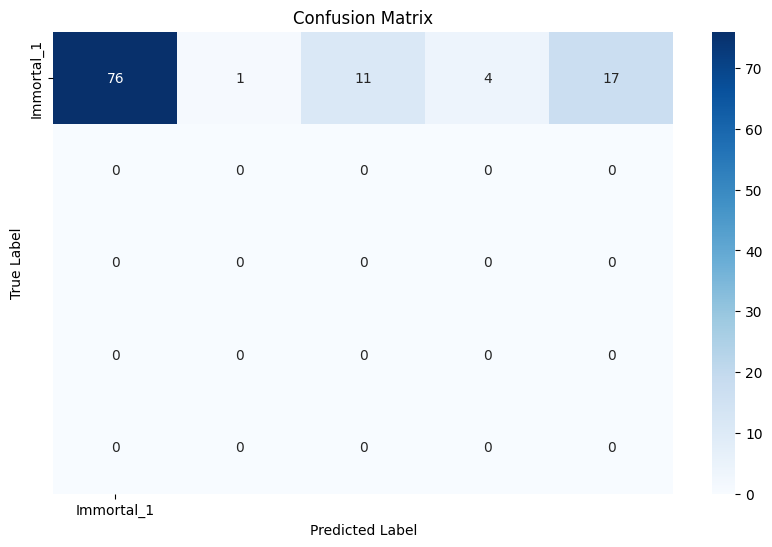

In [52]:
#class_names_test = ['Buy_Action', 'Class 0 Action', 'Class Skill Action', 'Dead_Action', 'Defuse Action', 'Orb Action', 'Plant Action', 'Shoot Action']
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
